<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/Adaptive_food_suggestion_by_Fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 42.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=26293a5cfd3c016c2833e332939be66c830f79ac9143ee81f5ee0028793bc1b9
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


6.910816556934147


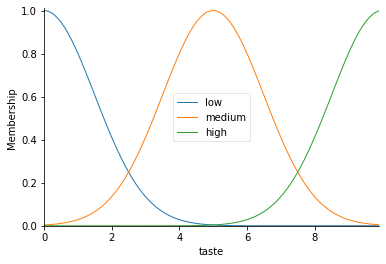

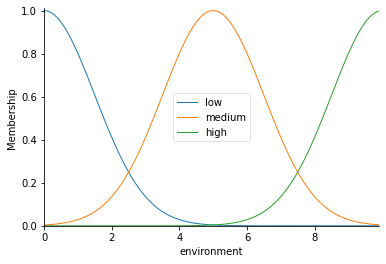

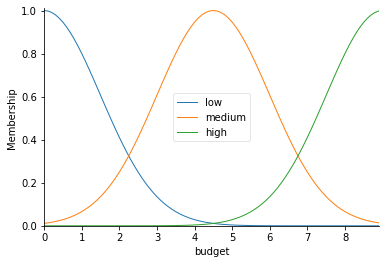

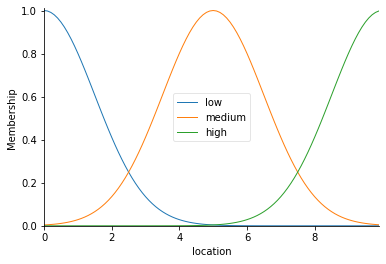

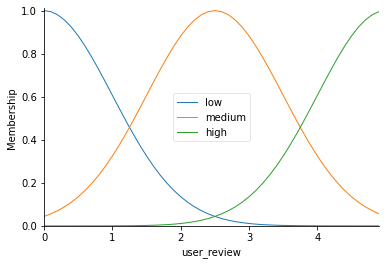

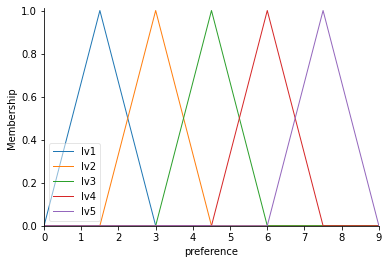

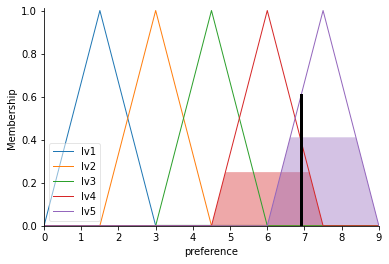

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(0,10,0.1), 'taste')
environment = ctrl.Antecedent(np.arange(0,10,0.1), 'environment')
budget = ctrl.Antecedent(np.arange(0,9,0.1), 'budget')
location = ctrl.Antecedent(np.arange(0,10,0.1), 'location')
user_review = ctrl.Antecedent(np.arange(0,5,0.1), 'user_review')
preference = ctrl.Consequent(np.arange(0,9.1,0.1), 'preference')

taste['low'] = fuzz.gaussmf(taste.universe, 0, 1.5)
taste['medium'] = fuzz.gaussmf(taste.universe, 5, 1.5)
taste['high'] = fuzz.gaussmf(taste.universe, 10, 1.5)

environment['low'] = fuzz.gaussmf(environment.universe, 0, 1.5)
environment['medium'] = fuzz.gaussmf(environment.universe, 5, 1.5)
environment['high'] = fuzz.gaussmf(environment.universe, 10, 1.5)

budget['low'] = fuzz.gaussmf(budget.universe, 0, 1.5)
budget['medium'] = fuzz.gaussmf(budget.universe, 4.5, 1.5)
budget['high'] = fuzz.gaussmf(budget.universe, 9, 1.5)

location['low'] = fuzz.gaussmf(location.universe, 0, 1.5)
location['medium'] = fuzz.gaussmf(location.universe, 5, 1.5)
location['high'] = fuzz.gaussmf(location.universe, 10, 1.5)

user_review['low'] = fuzz.gaussmf(user_review.universe, 0, 1)
user_review['medium'] = fuzz.gaussmf(user_review.universe, 2.5, 1)
user_review['high'] = fuzz.gaussmf(user_review.universe, 5, 1)

preference['lv1'] = fuzz.trimf(preference.universe, [0,1.5,3])
preference['lv2'] = fuzz.trimf(preference.universe, [1.5,3,4.5])
preference['lv3'] = fuzz.trimf(preference.universe, [3,4.5,6])
preference['lv4'] = fuzz.trimf(preference.universe, [4.5,6,7.5])
preference['lv5'] = fuzz.trimf(preference.universe, [6,7.5,9])

taste.view()
environment.view()
budget.view()
location.view()
user_review.view()
preference.view()

r1 = ctrl.Rule((taste['low'] & environment['low'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['medium'] & environment['low'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['medium'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['low'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['low'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['medium'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['medium'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['low'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['low'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['medium'] & location['low'] & user_review['low']) |
               (taste['medium'] & environment['low'] & budget['low'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['low'] & location['low'] & user_review['medium']) |
               (taste['low'] & environment['low'] & budget['medium'] & location['low'] & user_review['medium']) |
               (taste['high'] & environment['low'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['high'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['low'] & location['high'] & user_review['low']), preference['lv1'])

r2 = ctrl.Rule((taste['medium'] & environment['medium'] & budget['medium'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['medium'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['medium'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['low'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['low'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['medium'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['medium'] & location['low'] & user_review['medium']) |
               (taste['high'] & environment['medium'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['high'] & environment['low'] & budget['medium'] & location['low'] & user_review['low']) |
               (taste['high'] & environment['low'] & budget['low'] & location['medium'] & user_review['low']) |
               (taste['high'] & environment['low'] & budget['low'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['high'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['medium'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['low'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['low'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['high'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['high'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['high'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['high'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['low'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['low'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['medium'] & location['high'] & user_review['medium']) |
               (taste['low'] & environment['low'] & budget['low'] & location['high'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['medium'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['medium'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['medium'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['low'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['medium'] & location['low'] & user_review['medium']) |
               (taste['high'] & environment['high'] & budget['low'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['high'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['high'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['low'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['low'] & budget['low'] & location['low'] & user_review['high']) |
               (taste['high'] & environment['low'] & budget['high'] & location['low'] & user_review['low']) |
               (taste['high'] & environment['low'] & budget['low'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['low'] & location['low'] & user_review['high']), preference['lv2'])
r3 = ctrl.Rule((taste['medium'] & environment['medium'] & budget['medium'] & location['medium'] & user_review['medium']) |
               (taste['high'] & environment['low'] & budget['medium'] & location['medium'] & user_review['medium']) |
               (taste['high'] & environment['medium'] & budget['low'] & location['medium'] & user_review['medium']) |
               (taste['high'] & environment['medium'] & budget['medium'] & location['low'] & user_review['medium']) |
               (taste['low'] & environment['high'] & budget['medium'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['high'] & budget['low'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['high'] & budget['medium'] & location['low'] & user_review['medium']) |
               (taste['low'] & environment['medium'] & budget['high'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['high'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['high'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['medium'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['medium'] & location['high'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['medium'] & location['high'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['low'] & location['high'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['medium'] & location['low'] & user_review['high']) |
               (taste['low'] & environment['medium'] & budget['medium'] & location['medium'] & user_review['high']) |
               (taste['medium'] & environment['low'] & budget['medium'] & location['medium'] & user_review['high']) |
               (taste['medium'] & environment['medium'] & budget['low'] & location['medium'] & user_review['high']) |
               (taste['high'] & environment['high'] & budget['medium'] & location['low'] & user_review['low']) |
               (taste['high'] & environment['high'] & budget['low'] & location['medium'] & user_review['low']) |
               (taste['high'] & environment['high'] & budget['low'] & location['low'] & user_review['medium']) |
               (taste['high'] & environment['medium'] & budget['high'] & location['low'] & user_review['low']) |
               (taste['high'] & environment['low'] & budget['high'] & location['medium'] & user_review['low']) |
               (taste['high'] & environment['low'] & budget['high'] & location['low'] & user_review['medium']) |
               (taste['high'] & environment['medium'] & budget['low'] & location['high'] & user_review['low']) |
               (taste['high'] & environment['low'] & budget['medium'] & location['high'] & user_review['low']) |
               (taste['high'] & environment['low'] & budget['low'] & location['high'] & user_review['medium']) |
               (taste['high'] & environment['medium'] & budget['low'] & location['low'] & user_review['high']) |
               (taste['medium'] & environment['high'] & budget['high'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['high'] & location['medium'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['high'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['high'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['medium'] & budget['high'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['high'] & location['high'] & user_review['medium']) |
               (taste['medium'] & environment['low'] & budget['low'] & location['high'] & user_review['high']) |
               (taste['low'] & environment['medium'] & budget['low'] & location['high'] & user_review['high']) |
               (taste['low'] & environment['low'] & budget['medium'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['high'] & budget['high'] & location['low'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['high'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['low'] & budget['high'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['low'] & budget['low'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['high'] & budget['low'] & location['low'] & user_review['high']) |
               (taste['high'] & environment['low'] & budget['high'] & location['high'] & user_review['low']) |
               (taste['low'] & environment['high'] & budget['high'] & location['low'] & user_review['high']) |
               (taste['high'] & environment['medium'] & budget['medium'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['high'] & budget['medium'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['high'] & location['medium'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['medium'] & location['high'] & user_review['medium']) |
               (taste['medium'] & environment['medium'] & budget['medium'] & location['medium'] & user_review['high']) |
               (taste['high'] & environment['high'] & budget['medium'] & location['medium'] & user_review['low']) |
               (taste['medium'] & environment['high'] & budget['high'] & location['medium'] & user_review['low']) |
               (taste['medium'] & environment['medium'] & budget['high'] & location['high'] & user_review['low']) |
               (taste['medium'] & environment['medium'] & budget['low'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['medium'] & budget['low'] & location['medium'] & user_review['high']) |
               (taste['high'] & environment['medium'] & budget['high'] & location['low'] & user_review['medium']) |
               (taste['high'] & environment['medium'] & budget['medium'] & location['high'] & user_review['low']) |
               (taste['medium'] & environment['medium'] & budget['high'] & location['low'] & user_review['high']) |
               (taste['medium'] & environment['high'] & budget['low'] & location['medium'] & user_review['high']), preference['lv3'])
r4 = ctrl.Rule((taste['high'] & environment['high'] & budget['high'] & location['medium'] & user_review['low']) |
               (taste['high'] & environment['high'] & budget['high'] & location['low'] & user_review['medium']) |
               (taste['medium'] & environment['high'] & budget['low'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['low'] & budget['medium'] & location['high'] & user_review['high']) |
               (taste['medium'] & environment['high'] & budget['low'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['high'] & budget['medium'] & location['medium'] & user_review['high']) |
               (taste['medium'] & environment['high'] & budget['high'] & location['medium'] & user_review['high']) |
               (taste['medium'] & environment['medium'] & budget['high'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['medium'] & budget['medium'] & location['high'] & user_review['high']) |
               (taste['medium'] & environment['high'] & budget['medium'] & location['high'] & user_review['high']) |
               (taste['medium'] & environment['high'] & budget['high'] & location['high'] & user_review['medium']) |
               (taste['high'] & environment['high'] & budget['medium'] & location['high'] & user_review['medium']) |
               (taste['high'] & environment['high'] & budget['high'] & location['medium'] & user_review['medium']) |
               (taste['high'] & environment['high'] & budget['medium'] & location['high'] & user_review['medium']) |
               (taste['high'] & environment['medium'] & budget['high'] & location['medium'] & user_review['high']), preference['lv4'])
r5 = ctrl.Rule((taste['medium'] & environment['high'] & budget['high'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['medium'] & budget['high'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['high'] & budget['medium'] & location['high'] & user_review['high']) |
               (taste['high'] & environment['high'] & budget['high'] & location['medium'] & user_review['high']) |
               (taste['high'] & environment['high'] & budget['high'] & location['high'] & user_review['medium']) |
               (taste['high'] & environment['high'] & budget['high'] & location['high'] & user_review['high']), preference['lv5'])




preference_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5])
preference_simu = ctrl.ControlSystemSimulation(preference_ctrl)
preference_simu.input['taste'] = 8
preference_simu.input['environment'] = 10
preference_simu.input['budget'] = 7
preference_simu.input['location'] = 10
preference_simu.input['user_review'] = 4
preference_simu.compute()
print(preference_simu.output['preference'])
preference.view(sim = preference_simu )
